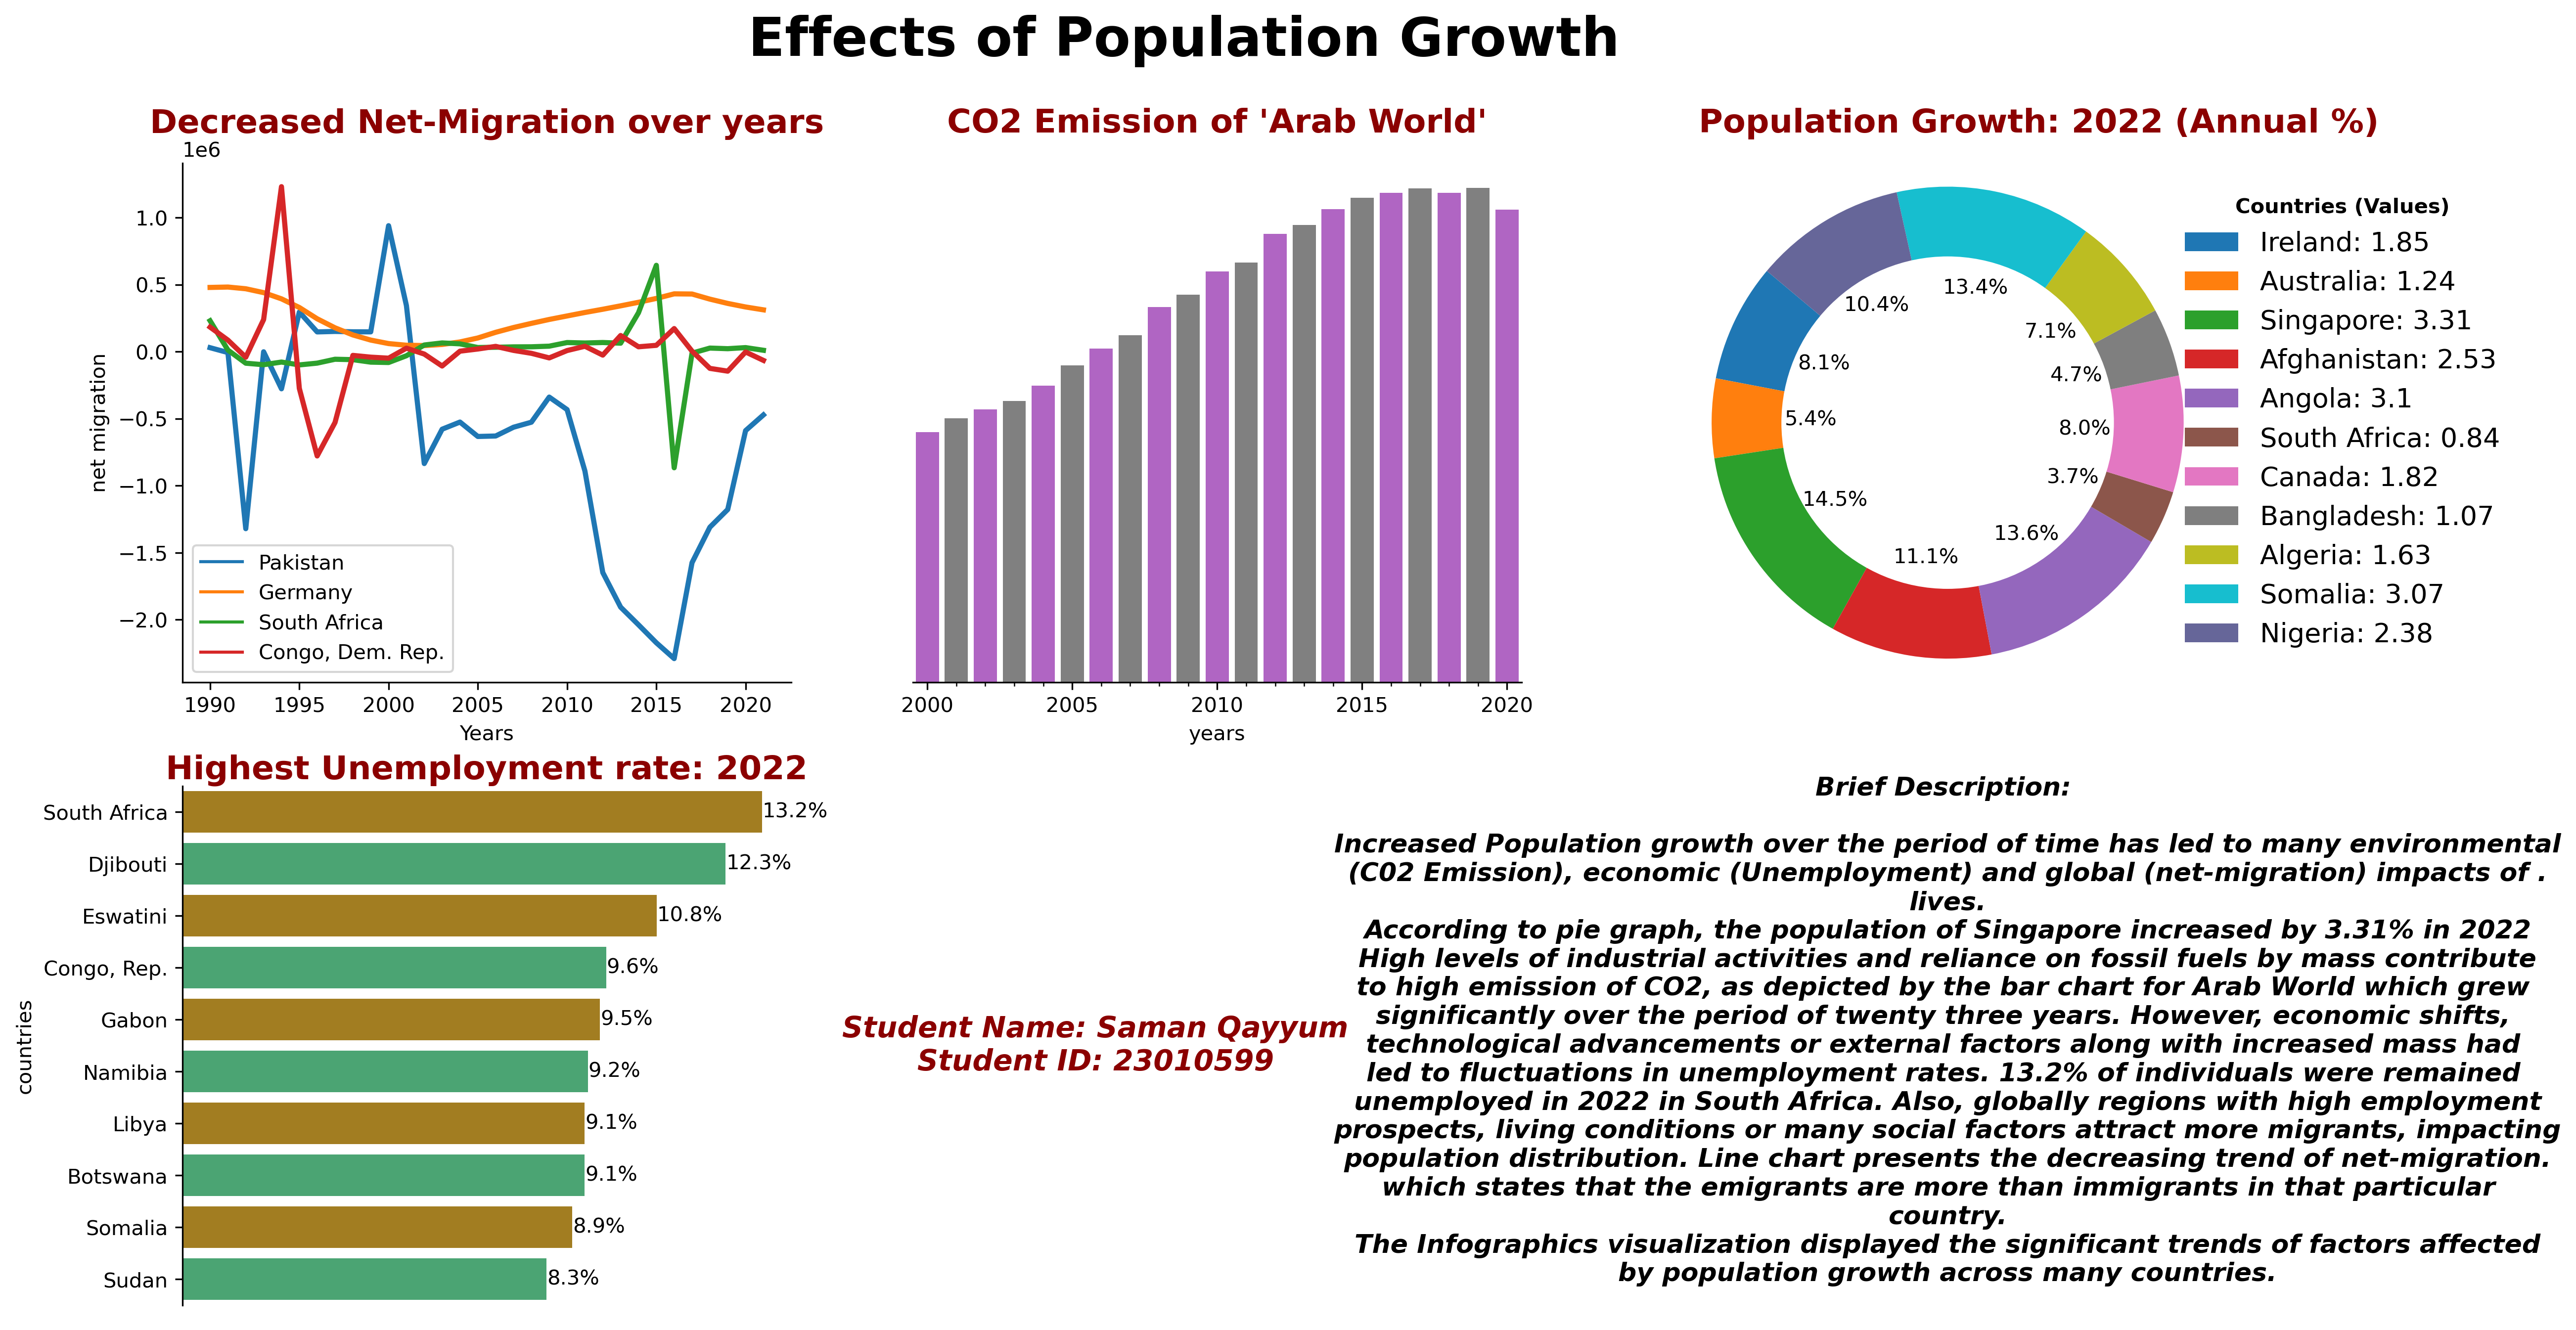

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  6 18:55:58 2024

@author: Saman
"""

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec


def read_world_bank_data(filename):
    """
    Read the World Bank data with filename.
    Process the dataframe into world bank format.
    Create two dataframes with years as index and countries as index.

    Parameters
    ----------
    filename : String
        Input the filename of csv.

    Returns
    -------
    df_year_index : Pandas.Dataframe
        Dataframe with years as index.
    df_country_index : Pandas.Dataframe
        Dataframe with countries as index.

    """

    # Read the World Bank data into the dataframe and skip 4 rows
    df = pd.read_csv(filename, skiprows=4)

    # years from 1990 to 2022 are selected
    start_year = 1990
    end_year = 2022
    all_cols_list = ["Country Name"] + \
        [str(year) for year in range(start_year, end_year + 1)]

    # Drop NA values
    df.dropna(axis=1)

    # Select the years columns
    df = df.loc[:, all_cols_list]

    # Set "Country Name" as the index
    df.index = df["Country Name"]
    df.drop("Country Name", axis=1, inplace=True)

    return df.T, df


def create_pie_chart(grid, df):
    """
    Create a pie chart representing the population growth of specific
    countries in the year 2022.

    Parameters:
    - grid: GridSpec (matplotlib.gridspec.GridSpec) -
         Specifies the geometry of the grid that subplots are placed in.
    - df: DataFrame - Contains population growth data
        for various countries and years.

    Returns:
    None
    """

    # Define the subplot within the specified grid
    plt.subplot(grid[0, 2])

    # List of countries to display in the pie chart
    countries = ['Ireland', 'Australia', 'Singapore', 'Afghanistan',
                 'Angola', 'South Africa', 'Canada', 'Bangladesh', 'Algeria',
                 'Somalia', 'Nigeria']

    # Filter the DataFrame for selected countries and round off values to
    # 2 decimal places for the year 2022
    df_filter = df.loc[countries, "2022"].round(2)

    # choose colors for the pie chart
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
              '#666699']

    # Plot the pie chart with colors, percentages and no labels
    wedges, texts, autotexts = plt.pie(df_filter, labels=None, autopct='%1.1f%%',
                                       startangle=140, colors=colors,
                                       pctdistance=0.58)

    # Draw a white circle in the center to create a donut chart
    center_circle = plt.Circle((0, 0), 0.7, color='white', fill=True)
    plt.gca().add_artist(center_circle)

    # Add legend with country names and corresponding population growth values
    legend = plt.legend(wedges, [f'{country}: {population_growth}' for country,
                                 population_growth in zip(countries, df_filter.values)],
                        title='Countries (Values)', loc='center left',
                        bbox_to_anchor=(0.85, 0.5), frameon=False, fontsize=13)

    # Set legend title to bold
    legend.get_title().set_fontweight('bold')

    # Set title for the plot
    plt.title('Population Growth: 2022 (Annual %)', fontsize=16,
              fontweight='bold', color='darkred', x=0.65, y=1.035)

    # Equal aspect ratio ensures that the pie is drawn as a circle
    plt.axis('equal')


def line_plot(grid, df, title, ylabel):
    """
    Creating a line plot indicating the net migration of selected
    countries from 1990 to 2021 from dataframe df

    Parameters
    ----------
    grid : matplotlib.gridspec.GridSpec
        The grid specification for subplot placement.
    df : pandas.DataFrame
        DataFrame for creating a line plot.
    title : str
        Title of the line plot.
    ylabel : str
        Y label of the line plot.

    Returns
    -------
    None
    """

    # Set subplot position based on the grid
    plt.subplot(grid[0, 0])

    # Select specific countries for the line plot
    country_list = ["Pakistan", "Germany", "South Africa", "Congo, Dem. Rep."]

    # Filter the DataFrame based on selected countries
    df_filter = df.loc[:, country_list]

    # Create a line plot using seaborn
    ax = sns.lineplot(data=df_filter, linewidth=2.5, dashes=False)

    # Set the x-axis major locator to display ticks every 5 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

    # Set plot title and axis labels
    plt.title(title, fontsize=16, y=1.035, fontweight='bold', color='darkred')
    plt.xlabel("Years")
    plt.ylabel(ylabel)

    # Remove spines (lines) around the axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Adjust legend position to upper left size of plot and its fontsize
    plt.legend(loc="lower left", fontsize=10)


def bar_plot(grid, df, title, ylabel):
    """
    Creating a bar plot for countries with maximum unemployment
    rate from dataframe df.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame for creating a bar plot.
    title : str
        Title of the bar plot.
    ylabel : str
        Y label of the plot.

    Returns
    -------
    None
    """

    # Set subplot position based on the grid
    plt.subplot(grid[1, 0])

    # Select countries with maximum rate of unemployment for the bar plot
    country_list = ["South Africa", "Djibouti", "Eswatini",
                    "Congo, Rep.", "Gabon", "Namibia", "Libya",
                    "Botswana", "Somalia", "Sudan"]

    # Filter the DataFrame based on selected countries and year 2022
    df_filter = df.loc[country_list, "2022"].reset_index(name='Count')

    # Define a custom color palette with two alternative colors
    custom_palette = sns.color_palette(["darkgoldenrod", "mediumseagreen"])

    # Create a bar plot using Seaborn
    ax = sns.barplot(data=df_filter, y="Country Name", x="Count",
                     palette=custom_palette)

    # Calculate the total sum of counts
    total = df_filter["Count"].sum()

    # Annotate each bar with its percentage relative to the total
    for p in ax.patches:
        percentage = '{:.1f}%'.format((p.get_width() / total) * 100)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='left', va='center')

    # Remove x-axis title and labels and x ticks
    ax.set(xlabel='')
    ax.set(xticklabels=[])
    ax.set(xticks=[])

    # Remove spines (lines) around the axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)

    # Set plot title and y-axis label
    plt.title(title, fontsize=16, y=0.99, fontweight='bold',
              color='darkred')
    plt.ylabel(ylabel)


def bar_plot2(grid, df, title, xlabel):
    """
    creating bar plot for CO2 emission of Arab World from year
    2000 to 2022 from dataframe df

    Parameters
    ----------
    df : pandas.dataframe
        create bar plot for dataframe df.
    title : string
        title of the bar plot.
    ylabel : string
        set the y label of the plot.

    Returns
    -------
    None.

    """

    # Set subplot position based on the grid
    plt.subplot(grid[0, 1])

    # Select country Arab World
    country_list = ["Arab World"]

    # filter the data for selected country from years 2000 to 2020
    df_filter = df.loc[country_list, "2000":"2020"]

    # Define a custom color palette with two alternative colors
    custom_palette = sns.color_palette(["mediumorchid", "grey"])

    # Create a bar plot using Seaborn
    ax = sns.barplot(data=df_filter, palette=custom_palette)

    # Remove y-axis title and labels and y ticks
    ax.set(ylabel='')
    ax.set(yticklabels=[])
    ax.set(yticks=[])

    # Turn on minor ticks
    ax.minorticks_on()

    # Remove spines (lines) around the axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    # Set the x-axis major locator to display ticks every 5 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    
    # Set plot title and y-axis label
    plt.title(title, fontsize=16, y=1.035, fontweight='bold', color='darkred')
    plt.xlabel(xlabel)


def display_text():
    """
    Display text information in two subplots, provide a main title,
    and save the plot.

    Returns
    -------
    None
    """

    # Set subplot position based on the grid
    plt.subplot(grid[1, 2])

    # Add text for description the infographics
    text = "Brief Description: \n\n" \
        "Increased Population growth over the period of time has led to many environmental\n" \
        "(C02 Emission), economic (Unemployment) and global (net-migration) impacts of .\n" \
        "lives.\n" \
        "According to pie graph, the population of Singapore increased by 3.31% in 2022\n" \
        "High levels of industrial activities and reliance on fossil fuels by mass contribute\n" \
        "to high emission of CO2, as depicted by the bar chart for Arab World which grew \n" \
        "significantly over the period of twenty three years. However, economic shifts, \n" \
        "technological advancements or external factors along with increased mass had \n" \
        "led to fluctuations in unemployment rates. 13.2% of individuals were remained \n" \
        "unemployed in 2022 in South Africa. Also, globally regions with high employment\n" \
        "prospects, living conditions or many social factors attract more migrants, impacting\n" \
        "population distribution. Line chart presents the decreasing trend of net-migration.\n" \
        "which states that the emigrants are more than immigrants in that particular  \n" \
        "country.\n" \
        "The Infographics visualization displayed the significant trends of factors affected\n" \
        "by population growth across many countries.\n" \

    # Adjust text font, fontsize and position
    plt.text(0.5, 0.5, text, ha='center', va='center', fontsize=12.5,
             color='black', fontstyle='italic', fontweight='bold')

    # Turn off axis for this subplot
    plt.axis('off')

    # Set subplot position based on the grid
    plt.subplot(grid[1, 1])

    # Add student name and ID
    text = "Student Name: Saman Qayyum\n" \
        "Student ID: 23010599"

    # Adjust text font, fontsize and position
    plt.text(0.3, 0.5, text, ha='center', va='center', fontsize=14,
             color='darkred', fontstyle='italic', fontweight='bold')

    # Turn off axis for this subplot
    plt.axis('off')

    # Main title for the entire dashboard
    fig.suptitle('Effects of Population Growth', fontsize=26,
                 fontweight='bold', color='black')

    # Save the plot as png
   # plt.savefig("23010599.png", dpi=300)


# read world bank data into two dataframes
P_Years_df, P_countries_df = read_world_bank_data("Population_Growth.csv")
M_Years_df, M_countries_df = read_world_bank_data("Net_Migration.csv")
C_Years_df, C_countries_df = read_world_bank_data("CO2_Emission.csv")
U_Years_df, U_countries_df = read_world_bank_data("Unemployment.csv")


# sns.set_theme()

# create infographics figure
fig = plt.figure(figsize=(18, 10), dpi=300)
fig.tight_layout()

# select the grid size
grid = GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

# Call the function to create the pie chart of population growth
create_pie_chart(grid, P_countries_df)

# Call the function to create the line chart of net migration
line_plot(grid, M_Years_df,
          "Decreased Net-Migration over years", "net migration")

# Call the function to create the bar chart of Unemployment rate
bar_plot(grid, U_countries_df,
         "Highest Unemployment rate: 2022", "countries")

# Call the function to create the bar chart of CO2 emission
bar_plot2(grid, C_countries_df, "CO2 Emission of 'Arab World'", "years")

# display the text and show the infographics
display_text()
plt.show()
